In [1]:
# Importing the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from ydata_profiling import ProfileReport

In [2]:
# Set the project directory
PROJECT_ROOT = '/mnt/c/Users/Linda/Desktop/GitHub_Projects/MLP_ProteinLocalization'

# Load the data
df = pd.read_csv(os.path.join(PROJECT_ROOT, 'data', 'processed_data.csv'))

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13005 entries, 0 to 13004
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniProt_AC  13005 non-null  object
 1   Type        13005 non-null  object
 2   Length      13005 non-null  int64 
 3   Sequence    12858 non-null  object
dtypes: int64(1), object(3)
memory usage: 406.5+ KB
None


In [3]:
# Display the first few rows
print(df.head())

  UniProt_AC Type  Length                                           Sequence
0     P10719   MT      46  MLSLVGRVASASASGALRGLNPLAALPQAHLLLRTAPAGVHPARDY...
1     Q38786   CH      55  MALLCSALSNSTHPSFRSHIGANSENLWHLSADPAQKSKRRCNLTL...
2     P15289   SP      18  MGAPRSLLLALAAGLAVARPPNIVLIFADDLGYGDLGCYGHPSSTT...
3     P25705   MT      43  MLSVRVAAAVVRALPRRAGLVSRNALGSSFIAARNFHASNTHLQKT...
4     P00829   MT      48  MLGLVGRVVAASASGALRGLSPSAPLPQAQLLLRAAPAALQPARDY...


In [4]:
# Display summary statistics of targeting peptide lengths
print("\nTargeting Peptide Length Statistics:")
print(df['Length'].describe())


Targeting Peptide Length Statistics:
count    13005.000000
mean         7.320415
std         14.388910
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max        162.000000
Name: Length, dtype: float64



Protein counts by subcellular location:
Type
Other    9537
SP       2697
MT        499
CH        227
TH         45
Name: count, dtype: int64


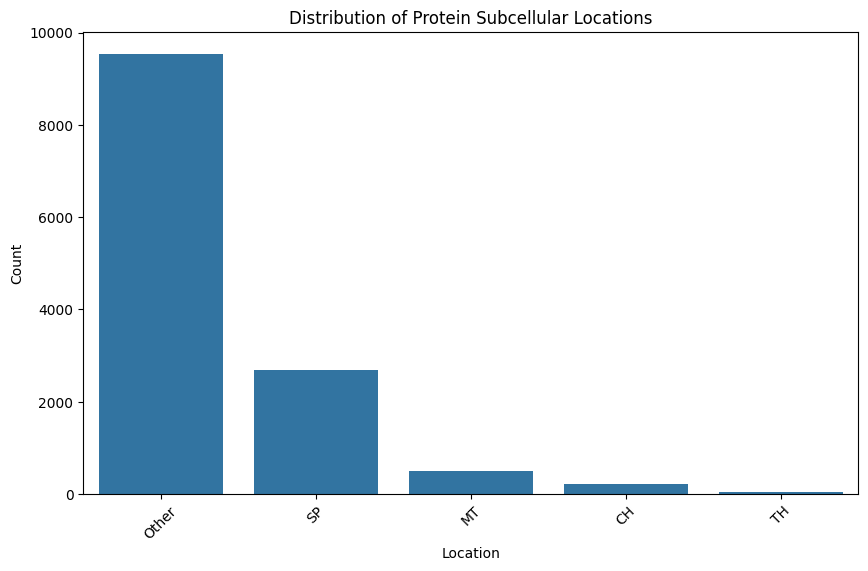

In [5]:
# Count the number of proteins in each subcellular location
location_counts = df['Type'].value_counts()
print("\nProtein counts by subcellular location:")
print(location_counts)

# Visualize the distribution of subcellular locations
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Distribution of Protein Subcellular Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

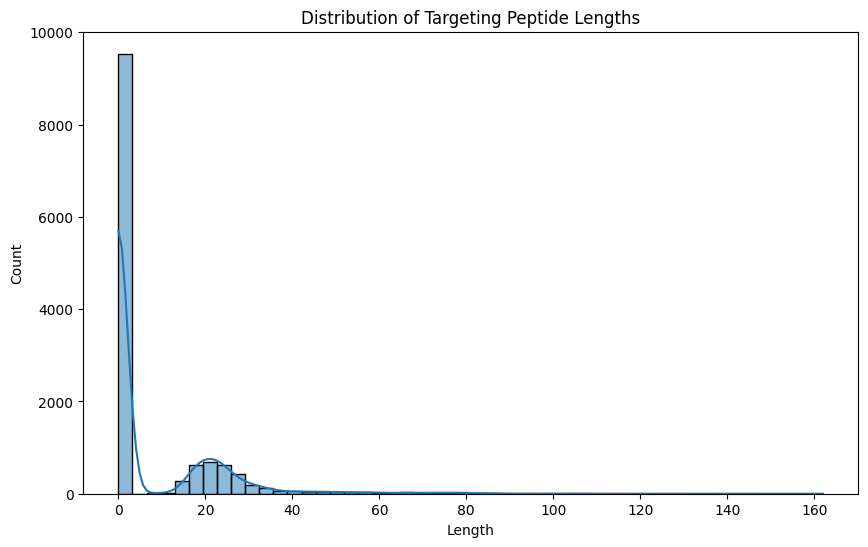

In [6]:
# Analyze sequence lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Length'], bins=50, kde=True)
plt.title('Distribution of Targeting Peptide Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


Average targeting peptide length by location:
Type
TH       82.288889
CH       57.731278
MT       35.651303
SP       22.470894
Other     0.000000
Name: Length, dtype: float64


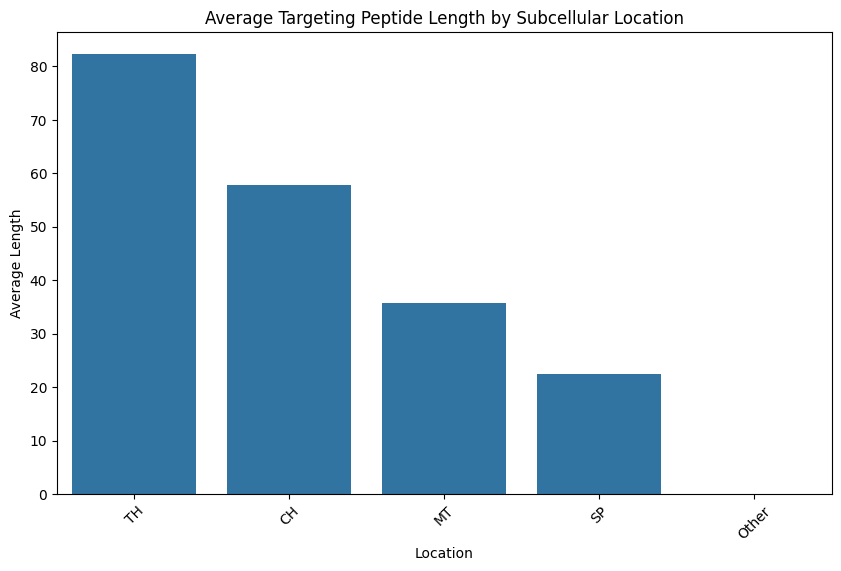

In [7]:
# Calculate and display average sequence length by location
avg_length_by_location = df.groupby('Type')['Length'].mean().sort_values(ascending=False)
print("\nAverage targeting peptide length by location:")
print(avg_length_by_location)

# Visualize average sequence length by location
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_length_by_location.index, y=avg_length_by_location.values)
plt.title('Average Targeting Peptide Length by Subcellular Location')
plt.xlabel('Location')
plt.ylabel('Average Length')
plt.xticks(rotation=45)
plt.show()

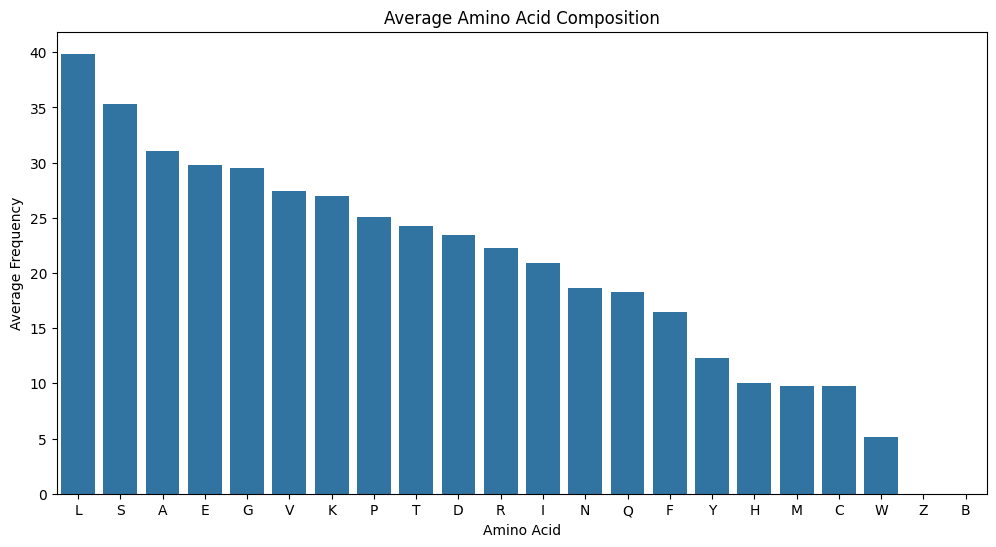

In [8]:
# Function to get amino acid composition
def get_aa_composition(sequence):
    if isinstance(sequence, str):
        return Counter(sequence)
    else:
        return Counter()  # Return an empty Counter for non-string entries

# Calculate amino acid composition for a subset of sequences (e.g., first 1000)
aa_compositions = df['Sequence'].head(1000).apply(get_aa_composition)
aa_df = pd.DataFrame(aa_compositions.tolist()).fillna(0)

# Calculate average amino acid composition
avg_aa_composition = aa_df.mean().sort_values(ascending=False)

# Visualize average amino acid composition
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_aa_composition.index, y=avg_aa_composition.values)
plt.title('Average Amino Acid Composition')
plt.xlabel('Amino Acid')
plt.ylabel('Average Frequency')
plt.xticks(rotation=0)
plt.show()

In [9]:
# Print information about missing sequences
missing_sequences = df['Sequence'].isna().sum()
print(f"\nNumber of missing sequences: {missing_sequences}")
print(f"Percentage of missing sequences: {(missing_sequences / len(df)) * 100:.2f}%")


Number of missing sequences: 147
Percentage of missing sequences: 1.13%


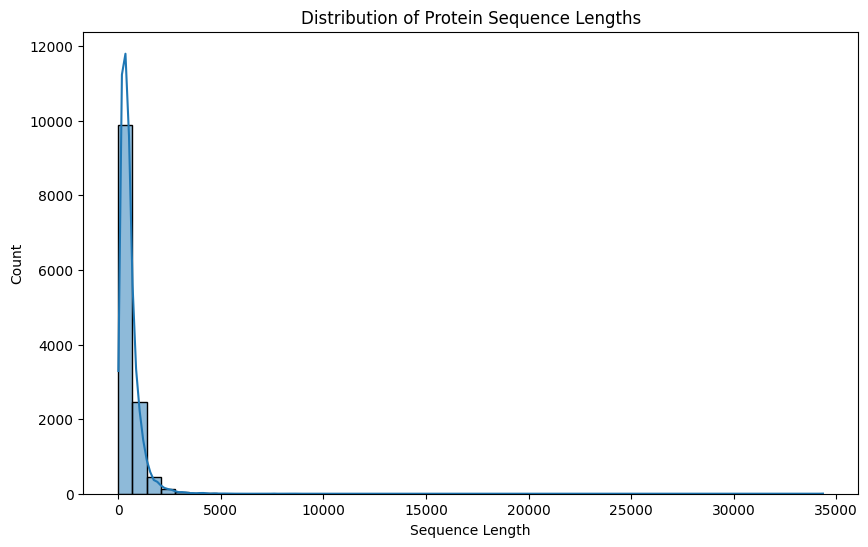

In [10]:
# Analyze the distribution of sequence lengths
df['Sequence_Length'] = df['Sequence'].apply(lambda x: len(x) if isinstance(x, str) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(df['Sequence_Length'], bins=50, kde=True)
plt.title('Distribution of Protein Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.show()

In [11]:
# Analyze class imbalance
imbalance_ratio = location_counts.max() / location_counts.min()
print(f"\nImbalance ratio (max/min): {imbalance_ratio:.2f}")


Imbalance ratio (max/min): 211.93


In [12]:
# Check for missing values
print(df.isnull().sum())

UniProt_AC           0
Type                 0
Length               0
Sequence           147
Sequence_Length      0
dtype: int64


In [13]:
# Print summary statistics of sequence lengths
print("\nSequence Length Statistics:")
print(df['Sequence_Length'].describe())


Sequence Length Statistics:
count    13005.000000
mean       539.079277
std        568.422898
min          0.000000
25%        234.000000
50%        419.000000
75%        667.000000
max      34350.000000
Name: Sequence_Length, dtype: float64


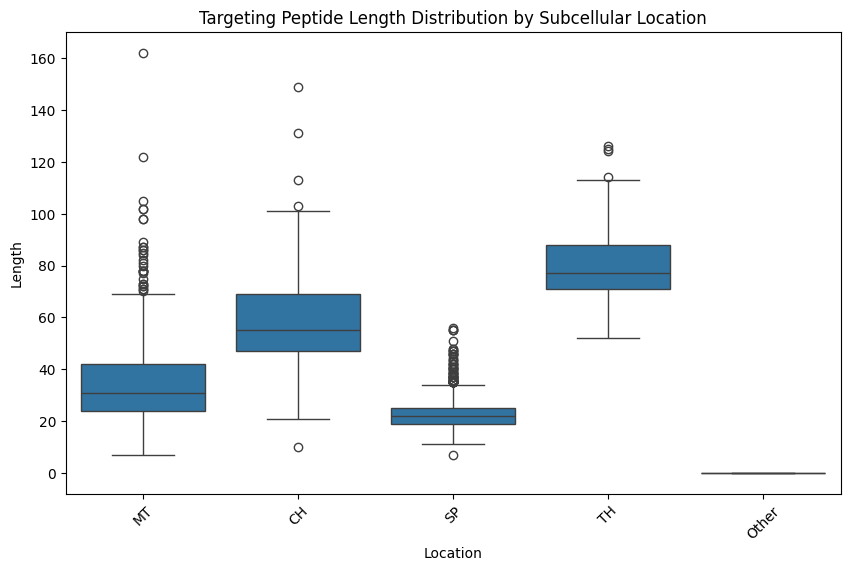

In [14]:
# Display correlation between sequence length and location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Length', data=df)
plt.title('Targeting Peptide Length Distribution by Subcellular Location')
plt.xlabel('Location')
plt.ylabel('Length')
plt.xticks(rotation=45)
plt.show()

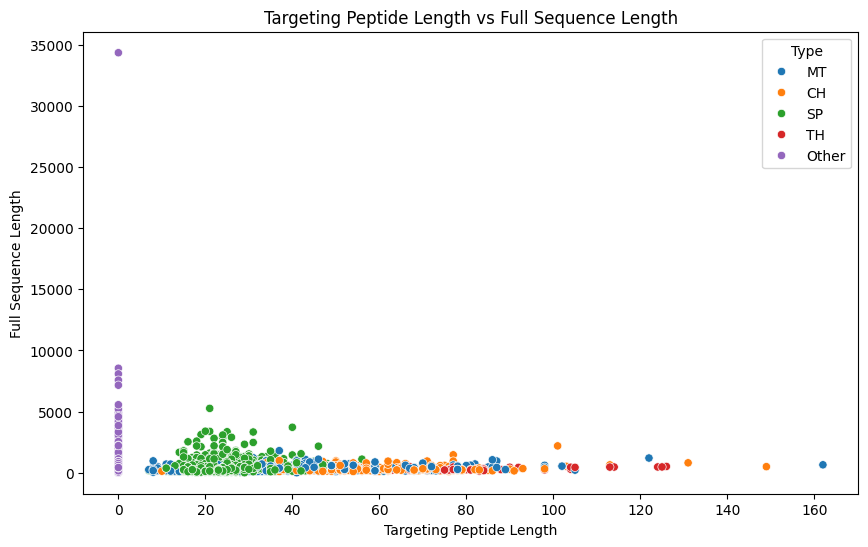

In [15]:
# Correlation between sequence length and targeting peptide length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length', y='Sequence_Length', hue='Type', data=df)
plt.title('Targeting Peptide Length vs Full Sequence Length')
plt.xlabel('Targeting Peptide Length')
plt.ylabel('Full Sequence Length')
plt.show()

In [16]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]